In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3

from sklearn.datasets import make_blobs

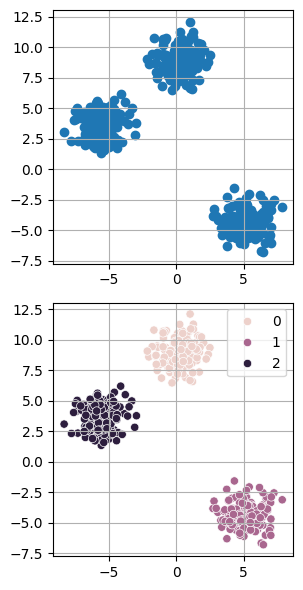

In [2]:

X,y = make_blobs(n_samples = 500,n_features =
2,centers = 3,random_state = 23)
fig, (axis, ax) = plt.subplots(2,
gridspec_kw={'height_ratios':[1,1]},
figsize=[3,6])
axis.grid(True)
axis.scatter(X[:,0], X[:,1])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y,
ax=ax)
ax.grid(True)
fig.tight_layout()
plt.show()

In [5]:
from sklearn.cluster import KMeans

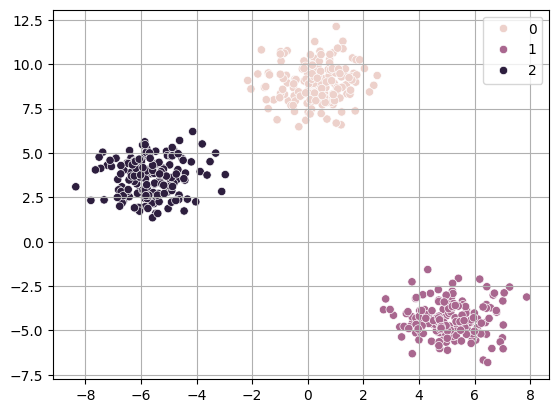

In [ ]:
kmeans = KMeans(n_clusters=3)

predicted_labels = kmeans.fit_predict(X) # sioje vietoje klasterizuoja

ax = sns.scatterplot(x=X[:, 0],y=X[:,1], hue=predicted_labels )
ax.grid(True)
plt.show()

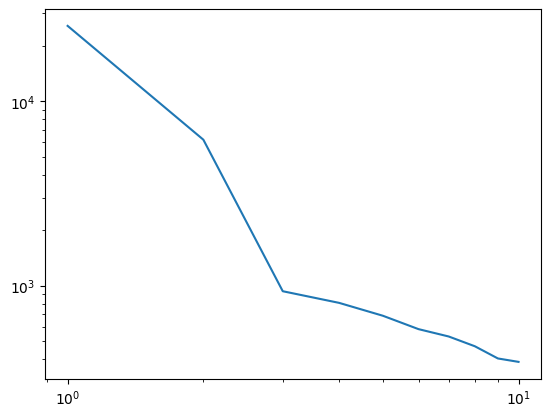

In [12]:
# kvadratiniu paklaidu suma
# inercijos paramemtras
# sum of squared errors

sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
ax = sns.lineplot(x=[*range(1, 11)], y=sse)
ax.loglog()
plt.show()

In [ ]:
#  Aruodas skelbimai
# Į kiek klasterių galima suskirstyti Vilniuje esančius sklebimus?
# X - features yra skelbimo koordinatės
# Ar galite suskaičiuoti kiekviename klasteryje esančią vidutinę būsto kainą?
# ?Atvaizduokite duoenis su mapbox()

In [13]:
SDB = sqlite3.connect('aruodas3.db')
Cs = SDB.cursor()

sql="""select * from aruododuomenys;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)
df = df_with_dubs.drop_duplicates()
df.head(2)

,plotas,kambariuskaicius,aukstas,aukstuskaicius,metai,pastatotipas,sildymas,irengimas,energetineklase,ilguma,platuma,miestas,kaina,rajonas
0,"34,93 m²",2,5,5,2023,Mūrinis,Centrinis kolektorinis,Įrengtas,None,54.701257,25.272667,Vilnius,173500,Šnipiškės
1,"66,64 m²",2,3,5,2003,Mūrinis,Centrinis,Įrengtas,A,54.705467,25.286944,Vilnius,205000,Žirmūnai


In [19]:

vilnius = df[df['miestas'] == 'Vilnius']
vilnius.dropna(inplace=True)
vilnius.head(2)

,plotas,kambariuskaicius,aukstas,aukstuskaicius,metai,pastatotipas,sildymas,irengimas,energetineklase,ilguma,platuma,miestas,kaina,rajonas
1,"66,64 m²",2,3,5,2003,Mūrinis,Centrinis,Įrengtas,A,54.705467,25.286944,Vilnius,205000,Žirmūnai
3,98 m²,3,2,5,2008,Mūrinis,Centrinis,Įrengtas,A+,54.691637,25.284638,Vilnius,615000,Šnipiškės


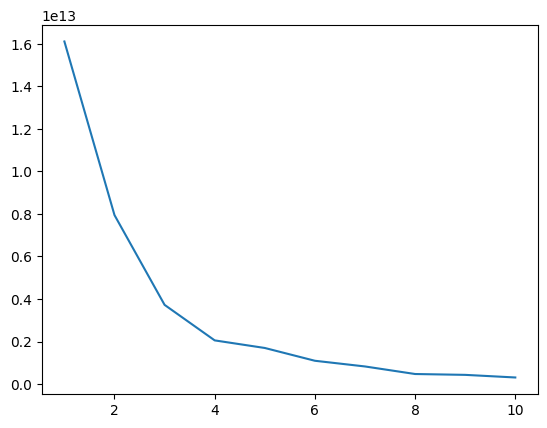

In [45]:
X = vilnius[['ilguma', 'platuma', 'kaina']].values


sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
ax = sns.lineplot(x=[*range(1, 11)], y=sse)
# ax.semilogy()
plt.show()

#  3 arba 4 klausteriai arba 10

In [46]:
kmeans = KMeans(n_clusters=5)
vilnius['cluster'] = kmeans.fit_predict(X)  # Add cluster labels to DataFrame

# predicted_labels = kmeans.fit_predict(X) # sioje vietoje klasterizuoja

# ax = sns.scatterplot(x=X[:, 0],y=X[:,1], hue=predicted_labels )
# ax.grid(True)
# plt.show()

In [25]:
import plotly.express as px

In [49]:
# Create a Mapbox scatter map
# fig = px.scatter_mapbox(vilnius, lat='ilguma', lon='platuma', text='rajonas', zoom=3, height=600)
fig = px.scatter_mapbox(vilnius, lat='ilguma', lon='platuma', color='cluster', text='rajonas',
                        zoom=5, height=600, title="Clustered Coordinates on Map")
# Set Mapbox style (you can choose other Mapbox styles)
fig.update_layout(mapbox_style="open-street-map")

# Show the map
fig.show()

In [36]:
vilnius

,plotas,kambariuskaicius,aukstas,aukstuskaicius,metai,pastatotipas,sildymas,irengimas,energetineklase,ilguma,platuma,miestas,kaina,rajonas,cluster
1,"66,64 m²",2,3,5,2003,Mūrinis,Centrinis,Įrengtas,A,54.705467,25.286944,Vilnius,205000,Žirmūnai,5
3,98 m²,3,2,5,2008,Mūrinis,Centrinis,Įrengtas,A+,54.691637,25.284638,Vilnius,615000,Šnipiškės,5
4,"46,23 m²",3,3,5,1969,Blokinis,Centrinis,Įrengtas,D,54.707286,25.286241,Vilnius,147500,Šnipiškės,5
6,"80,13 m²",4,2,9,2020,Mūrinis,Centrinis kolektorinis,Įrengtas,B,54.738766,25.223195,Vilnius,195000,Pašilaičiai,3
7,113 m²,4,1,2,2024,Mūrinis,Elektra,Dalinė apdaila,A++,54.712883,25.161247,Vilnius,188700,Pilaitė,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,"46,4 m²",2,5,7,2023,Mūrinis,Centrinis kolektorinis,Dalinė apdaila,A+,54.674380,25.233470,Vilnius,194900,Naujamiestis,1
3022,"48,05 m²",2,2,7,2023,Monolitinis,Centrinis kolektorinis,Dalinė apdaila,A+,54.702166,25.252630,Vilnius,188100,Žvėrynas,1
3023,"42,52 m²",2,3,7,2023,Monolitinis,Centrinis kolektorinis,Dalinė apdaila,A+,54.702166,25.252630,Vilnius,190000,Žvėrynas,1
3042,"66,82 m²",2,6,9,1999,Mūrinis,Centrinis kolektorinis,Įrengtas,C,54.696876,25.284465,Vilnius,209000,Šnipiškės,5


In [47]:
vilnius_gr = round(vilnius.groupby('cluster')['kaina'].mean())
vilnius_gr

cluster
0     337276.0
1    2075000.0
2     121414.0
3     638777.0
4     205033.0
Name: kaina, dtype: float64

In [48]:
vln_rj = vilnius.groupby('cluster')['rajonas'].unique()
for cluster, rajonas in vln_rj.items():
    print(f"Cluster {cluster}: {', '.join(rajonas)}")

Cluster 0: Baltupiai, Užupis, Šnipiškės, Naujamiestis, Verkiai, Žvėrynas, Markučiai, Rasos, Senamiestis, Valakampiai, Kalnėnai, Burbiškės, Žirmūnai, Lazdynėliai, Paupys, Antakalnis, Turniškės, Tarandė, Viršuliškės, Vilkpėdė, Pilaitė, Šeškinė
Cluster 1: Senamiestis
Cluster 2: Šnipiškės, Pilaitė, Naujamiestis, Baltupiai, Balsiai, Jeruzalė, Lazdynėliai, Justiniškės, Kalnėnai, Pašilaičiai, Fabijoniškės, Karoliniškės, Žirmūnai, Žvėrynas, Viršuliškės, Bajorai, Vilkpėdė, Šeškinė, Antakalnis, Žemieji Paneriai, Naujoji Vilnia, Lazdynai, Naujininkai, Senamiestis, Buivydiškės, Visoriai, Verkiai, Santariškės, Markučiai, Tarandė, Burbiškės
Cluster 3: Šnipiškės, Karoliniškės, Žirmūnai, Naujamiestis, Verkiai, Kairėnai, Žvėrynas, Senamiestis, Markučiai
Cluster 4: Žirmūnai, Pašilaičiai, Pilaitė, Baltupiai, Karoliniškės, Fabijoniškės, Markučiai, Naujamiestis, Viršuliškės, Šnipiškės, Justiniškės, Jeruzalė, Bajorai, Naujoji Vilnia, Lazdynėliai, Šeškinė, Burbiškės, Naujininkai, Kalnėnai, Antakalnis, Vilkpė